In [2]:
from datetime import datetime, timedelta
import pandas as pd
import time
import re
import numpy as np
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [79]:
scanteak_df = pd.read_csv("../Clean Data/clean_consolidated_scanteak (forum).csv")
castlery_df = pd.read_csv("../Clean Data/clean_consolidated_castlery (forum).csv")
wihardja_df = pd.read_csv("../Clean Data/clean_consolidated_wihardja (forum).csv")
star_living_df = pd.read_csv("../Clean Data/clean_consolidated_starliving (forum).csv")
grey_and_sanders_df = pd.read_csv("../Clean Data/clean_consolidated_greysanders (forum).csv")
teak_furniture_df = pd.read_csv("../Clean Data/clean_consolidated_furniture (forum).csv")

### Add metadata

In [80]:
scanteak_df['query'] = scanteak_df.apply(lambda x: "scanteak", axis=1)
scanteak_df['source'] = scanteak_df.apply(lambda x: "HardwareZone", axis=1)
scanteak_df['brand'] = scanteak_df.apply(lambda x: "scanteak", axis=1)

castlery_df['query'] = castlery_df.apply(lambda x: "castlery", axis=1)
castlery_df['source'] = castlery_df.apply(lambda x: "HardwareZone", axis=1)
castlery_df['brand'] = castlery_df.apply(lambda x: "castlery", axis=1)

wihardja_df['query'] = wihardja_df.apply(lambda x: "wihardja", axis=1)
wihardja_df['source'] = wihardja_df.apply(lambda x: "HardwareZone", axis=1)
wihardja_df['brand'] = wihardja_df.apply(lambda x: "wihardja", axis=1)

star_living_df['query'] = star_living_df.apply(lambda x: "star living", axis=1)
star_living_df['source'] = star_living_df.apply(lambda x: "HardwareZone", axis=1)
star_living_df['brand'] = star_living_df.apply(lambda x: "star living", axis=1)

grey_and_sanders_df['query'] = grey_and_sanders_df.apply(lambda x: "grey and sanders", axis=1)
grey_and_sanders_df['source'] = grey_and_sanders_df.apply(lambda x: "HardwareZone", axis=1)
grey_and_sanders_df['brand'] = grey_and_sanders_df.apply(lambda x: "grey and sanders", axis=1)

teak_furniture_df['query'] = teak_furniture_df.apply(lambda x: "teak furniture", axis=1)
teak_furniture_df['source'] = teak_furniture_df.apply(lambda x: "HardwareZone", axis=1)
teak_furniture_df['brand'] = teak_furniture_df.apply(lambda x: "teak furniture", axis=1)

### EDA

#### Total Discussions

In [81]:
print(f"Total Discussion (Scanteak): {scanteak_df.shape[0]} Posts")
print(f"Total Discussion (Castlery): {castlery_df.shape[0]} Posts")
print(f"Total Discussion (Wihardja): {wihardja_df.shape[0]} Posts")
print(f"Total Discussion (Star Living): {star_living_df.shape[0]} Posts")
print(f"Total Discussion (Grey and Sanders): {grey_and_sanders_df.shape[0]} Posts")
print(f"Total Discussion (Teak Furniture): {teak_furniture_df.shape[0]} Posts")

Total Discussion (Scanteak): 109 Posts
Total Discussion (Castlery): 128 Posts
Total Discussion (Wihardja): 7 Posts
Total Discussion (Star Living): 45 Posts
Total Discussion (Grey and Sanders): 10 Posts
Total Discussion (Teak Furniture): 146 Posts


#### Bar Plot

In [58]:
barplot_df = pd.DataFrame({'Brands': ['Scanteak',
                                     'Castlery',
                                     'wihardja',
                                     'starliving',
                                     'greysanders',
                                     'furniture'],
                          'Total Discussions': [scanteak_df.shape[0],
                                               castlery_df.shape[0],
                                               wihardja_df.shape[0],
                                               star_living_df.shape[0],
                                               grey_and_sanders_df.shape[0],
                                               teak_furniture_df.shape[0]]})

In [59]:
# Sort dataframe by total discussion
barplot_df =  barplot_df.sort_values(by ='Total Discussions')

<AxesSubplot:ylabel='Brands'>

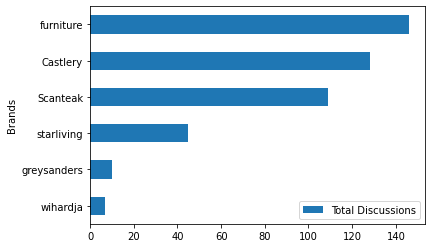

In [60]:
barplot_df.plot.barh(x='Brands')

#### Discussion by year per brands

In [62]:
scanteak_time = scanteak_df.groupby("Year")
castlery_time = castlery_df.groupby("Year")
wihardja_time = wihardja_df.groupby("Year")
star_living_time = star_living_df.groupby("Year")
grey_sander_time = grey_and_sanders_df.groupby("Year")
teak_time = teak_furniture_df.groupby("Year")

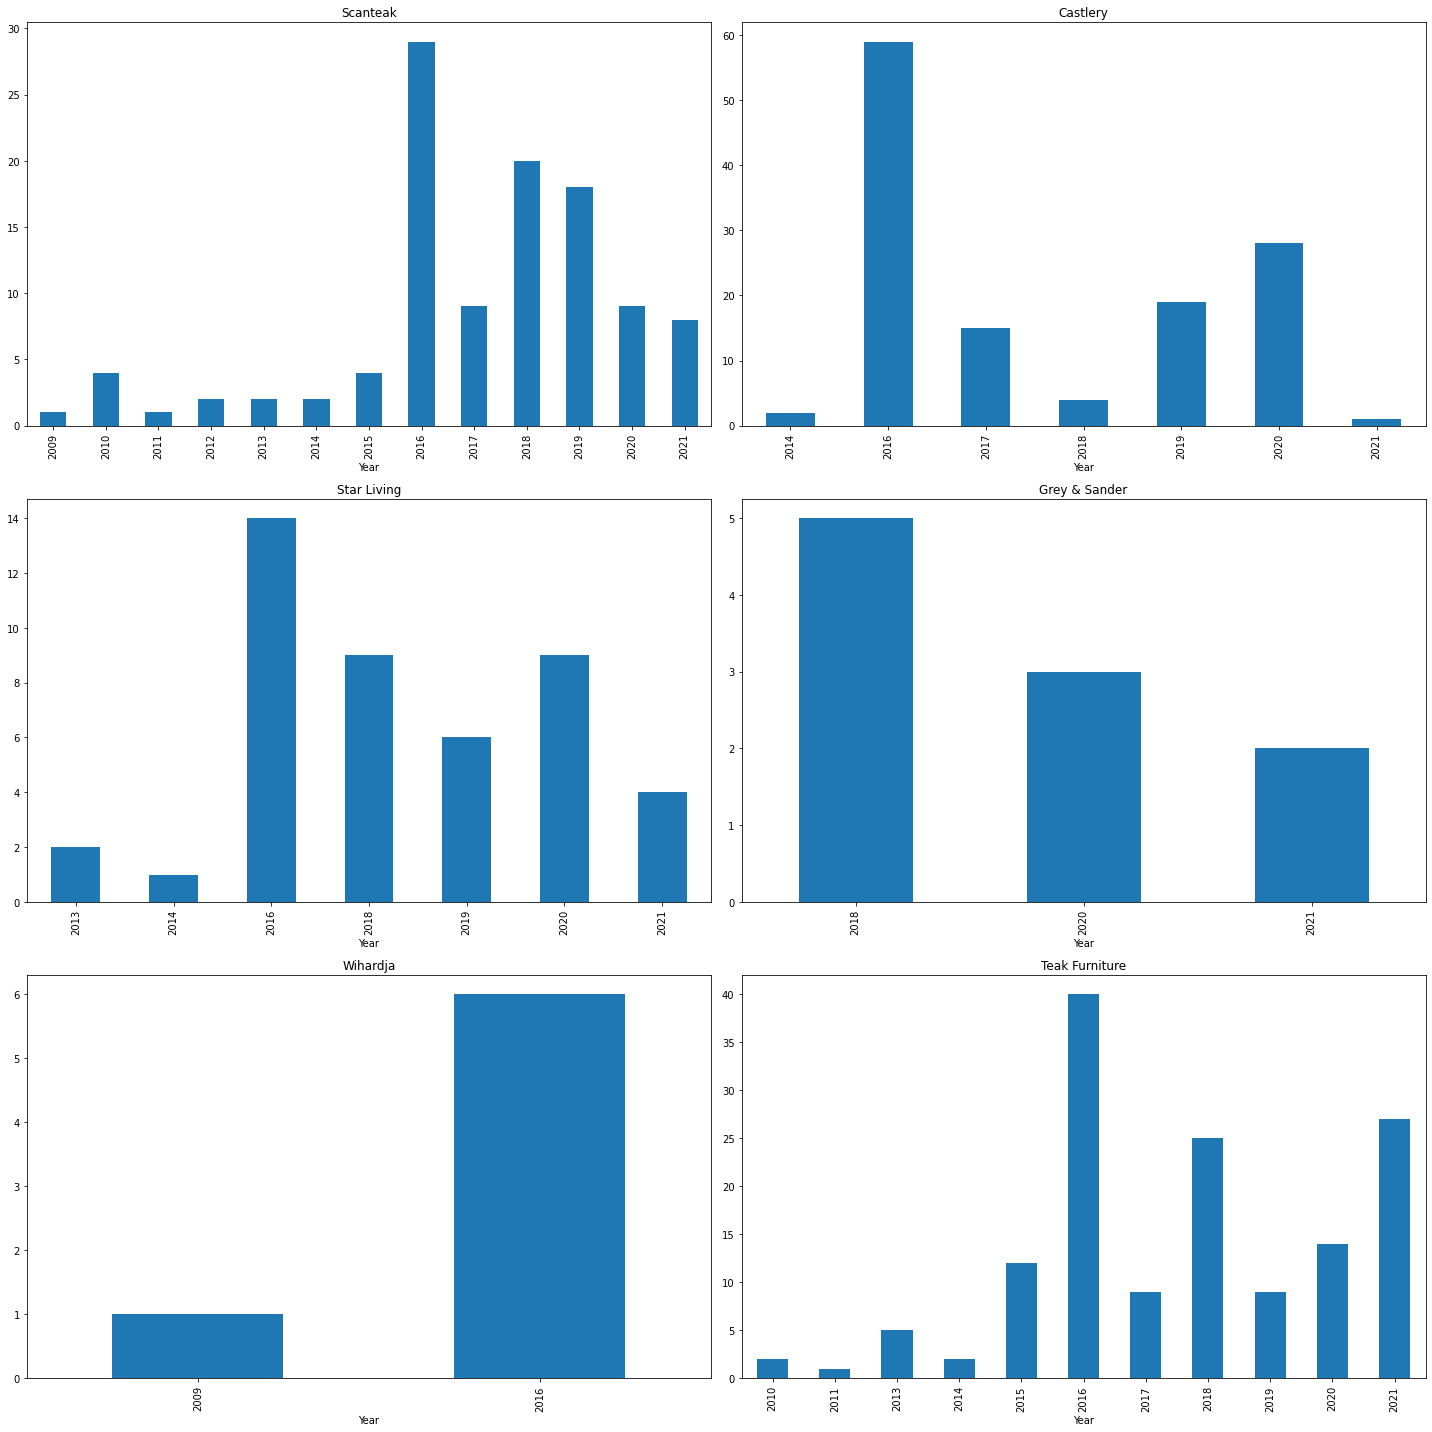

In [85]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))

scanteak_time.size().plot.bar(ax = axs[0,0], title="Scanteak")
castlery_time.size().plot.bar(ax = axs[0,1], title="Castlery")
star_living_time.size().plot.bar(ax = axs[1,0], title="Star Living")
grey_sander_time.size().plot.bar(ax = axs[1, 1], title="Grey & Sander")
wihardja_time.size().plot.bar(ax = axs[2,0], title="Wihardja")
teak_time.size().plot.bar(ax = axs[2,1], title="Teak Furniture")

plt.tight_layout()

#### Word Cloud

In [64]:
scanteak_message = scanteak_df["Body"].values
scanteak_text = " ".join(list(scanteak_message))

castlery_message = castlery_df["Body"].values
castlery_text = " ".join(list(castlery_message))

wihardja_message = wihardja_df["Body"].values
wihardja_text = " ".join(list(wihardja_message))

star_living_message = star_living_df["Body"].values
star_living_text = " ".join(list(star_living_message))

grey_and_sanders_message = str(grey_and_sanders_df["Body"].values)
grey_and_sanders_text = " ".join(list(grey_and_sanders_message))

teak_message = teak_furniture_df["Body"].values
teak_text = " ".join(list(teak_message))

In [65]:
stopwords = set(STOPWORDS)
stopwords.update(["scanteak", "castlery", "wihardja", "star", "living", "grey", 
                  "sanders", "mahogany", "teak", "one", "https", "Quote", "RYANISHANDSOME"])

scanteak_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(scanteak_text)
castlery_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(castlery_text)
wihardja_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(wihardja_text)
star_living_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(star_living_text)
grey_and_sanders_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(grey_and_sanders_text)
teak_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(teak_text)

##### Scanteak Wordcloud

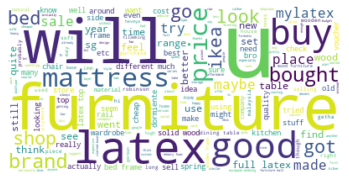

In [66]:
plt.imshow(scanteak_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Castlery

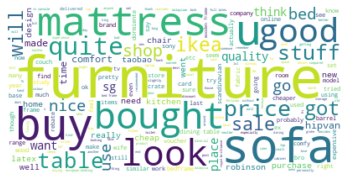

In [67]:
plt.imshow(castlery_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Star Living 

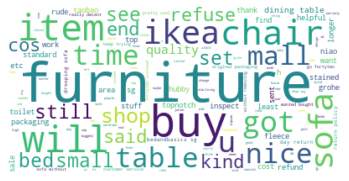

In [68]:
plt.imshow(star_living_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Grey and Sanders

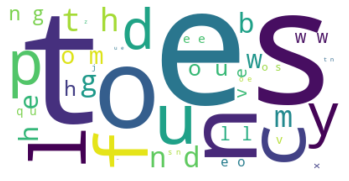

In [70]:
plt.imshow(grey_and_sanders_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Wihardja

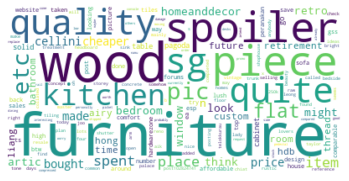

In [71]:
plt.imshow(wihardja_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Furniture

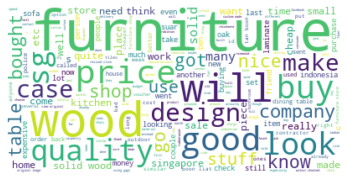

In [53]:
plt.imshow(teak_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()